# `Business Understanding`

Train a machine learning model to predict the `product category` based on the other features.

# `Data Understanding`

## Importation of all necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Read Data

In [2]:
df = pd.read_csv('dollar_tree.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [4]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [5]:
df.corr(numeric_only=True).style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083338,-0.145997
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892
Revenue,-0.083338,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


# `Data Preparation`

## Data Cleaning

In [6]:
"""drop columns with unnecessary or redundant features:
1. index and Column1 are unnecessary features
2. month is a better indicator of sesonality that the date and year
3. state is a redudant feature 
4. unit cost, unit price and quantity can be combined into cost(unit cost*quantity) and revenue (unit price*quantity)""" 

dfclean=df.drop(columns=['index','Date', 'Year', 'Column1','State', 'Unit Cost', 'Unit Price', 'Quantity'],axis=1)

#rename columns for easy of access
dfclean.rename(columns={'Customer Age': 'age', 'Customer Gender' :'gender','Product Category': 'product_category','Sub Category':'sub_category'},inplace=True)
dfclean.head()

,Month,age,gender,Country,product_category,sub_category,Cost,Revenue
0,February,29.0,F,United States,Accessories,Tires and Tubes,80.0,109.0
1,February,29.0,F,United States,Clothing,Gloves,49.0,57.0
2,February,29.0,F,United States,Accessories,Tires and Tubes,11.0,15.0
3,March,29.0,F,United States,Accessories,Tires and Tubes,175.0,233.0
4,March,29.0,F,United States,Accessories,Tires and Tubes,105.0,125.0


In [7]:
#check for null values in the new dataframe 
dfclean.isnull().sum()

Month               1
age                 1
gender              1
Country             1
product_category    1
sub_category        1
Cost                1
Revenue             0
dtype: int64

In [8]:
#drop null values in product category and sub category
dfclean=dfclean.dropna(subset=['product_category', 'sub_category'])
#check for null values
dfclean.isnull().sum()


Month               0
age                 0
gender              0
Country             0
product_category    0
sub_category        0
Cost                0
Revenue             0
dtype: int64

## Divide data into input and output

In [9]:
#split the data into input(features) and output(target)
y=dfclean['product_category']
x=dfclean[['Month','age','gender', 'Country','sub_category', 'Cost','Revenue']]



In [10]:
#split data into training and test data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
len(y_test)

6974

## Encoding

### 1. Encode the target column (the labels)


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



In [13]:
len(y_test_encoded)

6974

### 2. Encode categorical columns

In [14]:
#use one hot encoding for categorical variables and set drop_first to true to reduce multicolinearity
x_train_encoded=pd.get_dummies(x_train[['Month','gender', 'Country','sub_category']],drop_first=True)
x_test_encoded=pd.get_dummies(x_test[['Month','gender', 'Country','sub_category']], drop_first=True)





In [15]:
x_test_encoded.shape

(6974, 31)

### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


In [16]:
#Replace original categorical columns with encoded ones
x_train_f = pd.concat([x_train.drop(columns=['Month','age','gender', 'Country','sub_category']),
                           x_train_encoded], axis=1).reset_index(drop=True)

x_test_f = pd.concat([x_test.drop(columns=['Month','age','gender', 'Country','sub_category']),
                          x_test_encoded], axis=1).reset_index(drop=True)

In [17]:
y_test_encoded.shape

(6974,)

# `Modeling`

In [18]:
#use the RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

#initialize the classifier 
clf=RandomForestClassifier(random_state=42)

#train the data 
clf.fit(x_train_f, y_train_encoded)

#make a prediction
y_prediction=clf.predict(x_test_f)


# `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

In [19]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test_encoded, y_prediction)
cf_matrix


array([[4510,    0,    0],
       [   0, 1456,    0],
       [   0,    0, 1008]], dtype=int64)

<Figure size 1000x700 with 0 Axes>

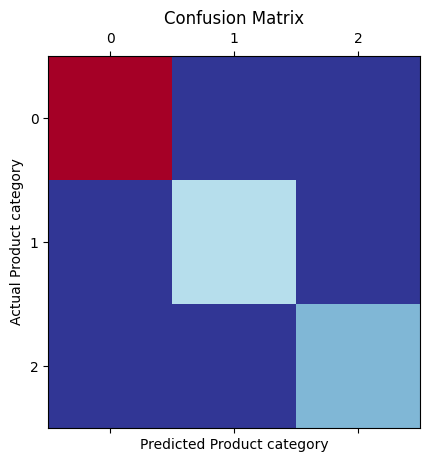

In [20]:
plt.figure(figsize=(10, 7))
plt.matshow(cf_matrix, cmap=plt.cm.RdYlBu_r)
plt.title("Confusion Matrix")
plt.ylabel('Actual Product category')
plt.xlabel('Predicted Product category')
plt.show()

### Build a classification Report

In [21]:
from sklearn.metrics import classification_report

classification_report(y_test_encoded, y_prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4510\n           1       1.00      1.00      1.00      1456\n           2       1.00      1.00      1.00      1008\n\n    accuracy                           1.00      6974\n   macro avg       1.00      1.00      1.00      6974\nweighted avg       1.00      1.00      1.00      6974\n'